<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/Browniano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulación del Movimiento Browniano y Refinamiento de Trayectorias**

El Movimiento Browniano estándar es un proceso estocástico en tiempo continuo que satisface las siguientes propiedades fundamentales:

1.  **Inicio en cero:** $W_0 = 0$ casi seguramente.
2.  **Incrementos Independientes:** Para $0 \leq t_1 < t_2 < \dots < t_k$, los incrementos $W_{t_2} - W_{t_1}, \dots, W_{t_k} - W_{t_{k-1}}$ son variables aleatorias independientes.
3.  **Incrementos Gaussianos:** El incremento $W_{t+s} - W_t$ sigue una distribución normal con media 0 y varianza $s$: $$W_{t+s} - W_t \sim \mathcal{N}(0, s)$$
4.  **Continuidad:** Las trayectorias $t \to W_t$ son continuas en casi todas partes, aunque no son diferenciables en ningún punto.

### Construcción Discreta (Método de Euler-Maruyama)
Para simular este proceso en una computadora, discretizamos el intervalo de tiempo $[0, T]$ en $L$ pasos de tamaño $\Delta t = T/L$. La construcción recursiva se define como:

$$W_{t_{i+1}} = W_{t_i} + \sqrt{\Delta t} \cdot Z_i$$

Donde $Z_i \sim \mathcal{N}(0, 1)$ es una variable aleatoria normal estándar.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def browniano(T=1, L=500):
    dt = T/L
    W = np.zeros(L+1)
    for i in range(L):
        xi = np.random.normal(0,1)
        W[i+1] = W[i] + np.sqrt(dt)*xi
    return W

Simulamos múltiples realizaciones del proceso para observar la naturaleza aleatoria y la dispersión de las trayectorias a medida que avanza el tiempo $t$. Se puede observar que la varianza del proceso aumenta linealmente con el tiempo ($\text{Var}(W_t) = t$).

In [39]:
trayectorias = 100

T = 1
L = 500
t = np.linspace(0, T, L+1)

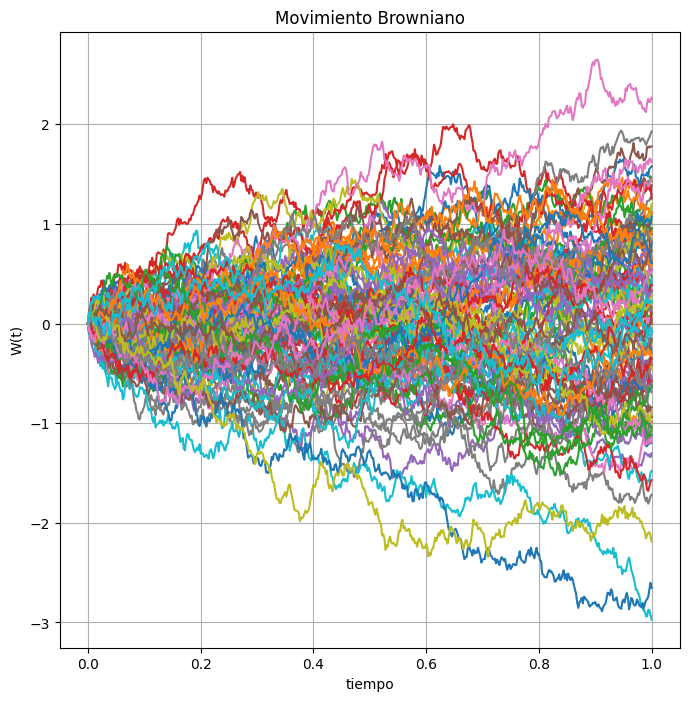

In [40]:
plt.figure(figsize=(8,8))
for _ in range(trayectorias):
    W = browniano(T, L)
    plt.plot(t, W)
plt.title("Movimiento Browniano")
plt.xlabel("tiempo")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

## Refinamiento de Trayectorias (Interpolación Estocástica)

Para aumentar la resolución de una simulación existente sin descartar los puntos ya calculados, utilizamos las propiedades del **Puente Browniano**.

Si conocemos los valores del proceso en dos instantes de tiempo $W(t)$ y $W(t + \Delta t)$, el valor en el punto medio $W(t + \frac{\Delta t}{2})$ no es arbitrario, sino que sigue una distribución condicional normal:

$$W\left(t + \frac{\Delta t}{2}\right) \Bigg| W(t), W(t+\Delta t) \sim \mathcal{N}\left( \frac{W(t) + W(t+\Delta t)}{2}, \frac{\Delta t}{4} \right)$$

Utilizamos la siguiente fórmula para generar el punto medio:

$$W_{med} = \frac{W_{inicio} + W_{fin}}{2} + \frac{\sqrt{\Delta t}}{2} \cdot Z$$

Donde:
* El primer término es la media (interpolación lineal).
* El segundo término añade la variabilidad estocástica necesaria (con la varianza ajustada $\frac{\Delta t}{4}$).

In [41]:
# 1) Trayectoria browniana "gruesa"
def browniano(T=1.0, L=50):
    dt = T / L
    t = np.linspace(0, T, L+1)
    W = np.zeros(L+1)
    for i in range(L):
        xi = np.random.normal(0, 1)
        W[i+1] = W[i] + np.sqrt(dt) * xi
    return t, W

# 2) Refinamiento usando la fórmula de tu apunte
def refinar_trayectoria(t, W):
    n = len(W)             # n = L+1
    dt = t[1] - t[0]

    # nuevas listas: tendrán 2*n-1 puntos (se meten puntos medios)
    t_ref = np.zeros(2*n - 1)
    W_ref = np.zeros(2*n - 1)

    # copiamos los puntos originales en posiciones pares
    t_ref[::2] = t
    W_ref[::2] = W

    # rellenamos los puntos medios
    for i in range(n - 1):
        t_ref[2*i + 1] = 0.5 * (t[i] + t[i+1]) # tiempo medio

        xi = np.random.normal(0, 1) # ruido normal

        # fórmula de refinamiento:
        # W_{i+1/2} = 1/2 (W_i + W_{i+1}) + 1/2 sqrt(dt) * xi
        W_ref[2*i + 1] = 0.5 * (W[i] + W[i+1]) + 0.5 * np.sqrt(dt) * xi

    return t_ref, W_ref

In [42]:
T = 1.0
L = 20

t, W = browniano(T, L)
t_ref, W_ref = refinar_trayectoria(t, W)

Observamos cómo la trayectoria "refinada" (línea sólida) pasa exactamente por los puntos de la trayectoria "original" (marcadores circulares), pero añade detalle estocástico en los intervalos intermedios. Esto demuestra la naturaleza fractal del movimiento browniano: al refinar el paso de tiempo, el proceso sigue mostrando rugosidad y no se suaviza en una línea recta.

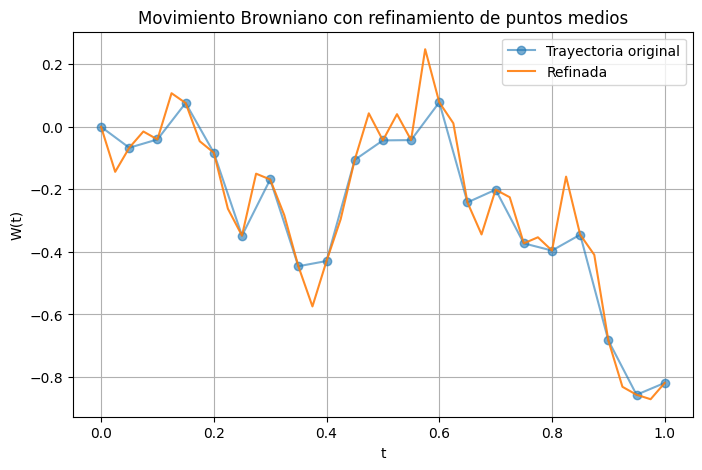

In [43]:
plt.figure(figsize=(8,5))
plt.plot(t, W, 'o-', label='Trayectoria original', alpha=0.6)
plt.plot(t_ref, W_ref, '-', label='Refinada', alpha=0.9)
plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Movimiento Browniano con refinamiento de puntos medios")
plt.grid(True)
plt.legend()
plt.show()